<a href="https://colab.research.google.com/github/Ariqueeezz/MachineLearningProject/blob/main/Tugas_ML_Pert_13_Clustering'2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Libraries***

In [128]:
# Manipulasi Data
import pandas as pd
import numpy as np

# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Model Selection
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# ***Data Loading***

In [129]:
!pip install kagglehub[pandas-datasets]

In [130]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = 'bank_transactions_data_2.csv'

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "valakhorasani/bank-transaction-dataset-for-fraud-detection",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/tmp/ipython-input-547114717.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'bank-transaction-dataset-for-fraud-detection' dataset.


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [132]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


# ***Data Preprocessing***

## **Menghapus Kolom dengan Keterangan ID dan IP Address**

In [133]:
df = df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address'])

## **Feature Encoding**

In [134]:
category_features = df.select_dtypes(include=['object']).columns
encoders = {}

for col in category_features:
  encoder = LabelEncoder()
  df[col] = encoder.fit_transform(df[col])
  encoders[col] = encoder

df[category_features].head()

,TransactionDate,TransactionType,Location,Channel,CustomerOccupation,PreviousTransactionDate
0,684,1,36,0,0,105
1,1192,1,15,0,0,192
2,1276,1,23,2,3,41
3,823,1,33,2,3,163
4,1959,0,1,2,3,16


In [135]:
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

# ***Modelling: K-Means Clustering***

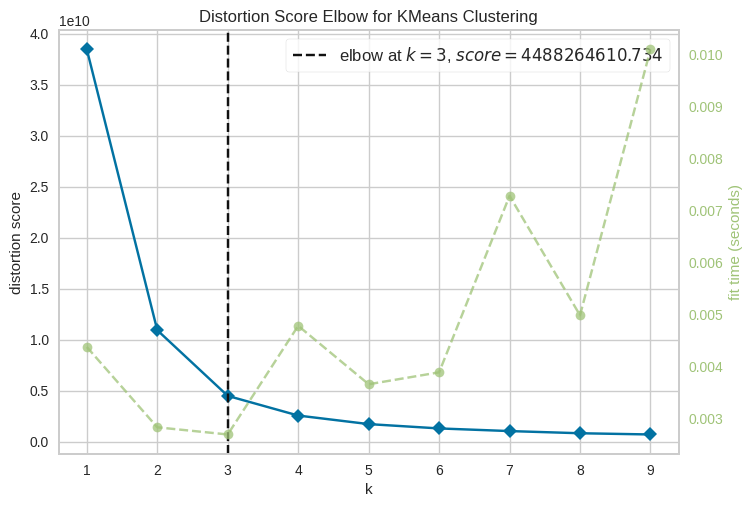

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [178]:
X = df.drop(columns=['TransactionDate', 'PreviousTransactionDate', 'Location']).values

kmeans = KMeans()

# K-Elbow Method
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(X)
visualizer.show()

In [168]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

Silhoutte Score: 0.4553740244592072


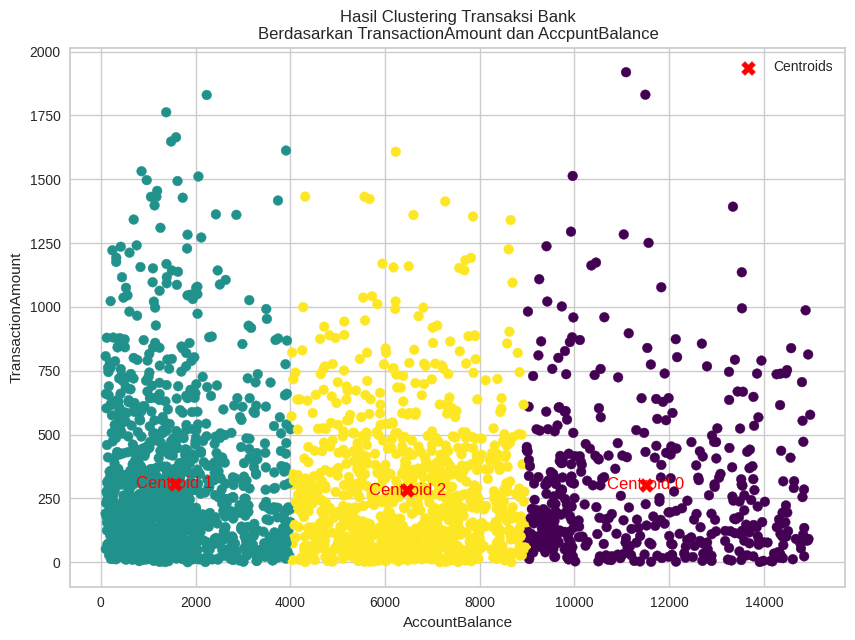

In [182]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

score = silhouette_score(X, labels)
print("Silhoutte Score:", score)

# Membuat visualisasi hasil clustering
x_label = 'AccountBalance'
y_label = 'TransactionAmount'

X_visualisasi = df[[x_label, y_label]].values

kmeans_visualisasi = KMeans(n_clusters=3, random_state=42)
kmeans_visualisasi.fit(X_visualisasi)

labels_visualisasi = kmeans_visualisasi.labels_
centroids_visualisasi = kmeans_visualisasi.cluster_centers_

plt.figure(figsize=(10, 7))

plt.scatter(X_visualisasi[:, 0], X_visualisasi[:, 1], c=labels_visualisasi, cmap='viridis')
plt.scatter(centroids_visualisasi[:, 0], centroids_visualisasi[:, 1], marker='X', color='red', s=100, label='Centroids')

for i, cent in enumerate(centroids_visualisasi):
    plt.text(cent[0], cent[1], f'Centroid {i}', color='red', fontsize=12, ha='center', va='center')

plt.title('Hasil Clustering Transaksi Bank\nBerdasarkan TransactionAmount dan AccpuntBalance')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()
plt.grid(True)
plt.show()

## **Interpretasi Hasil Cluster: Metric Rata-Rata (Mean)**

In [175]:
X = pd.DataFrame(X, columns=df.drop(columns=['TransactionDate', 'PreviousTransactionDate', 'Location']).columns.tolist())
X['Target'] = labels
X.groupby(['Target']).agg(['mean', 'min', 'max'])[['TransactionAmount', 'CustomerAge', 'AccountBalance']]

TransactionAmount                 ... AccountBalance                   
                    mean   min      max  ...           mean      min       max
Target                                   ...                                  
0             304.145024  1.14  1919.11  ...   11590.857251  9045.19  14977.99
1             308.702976  0.26  1830.00  ...    1571.617792   101.25   4040.32
2             281.178771  0.32  1607.55  ...    6519.823411  4044.62   9040.33

[3 rows x 9 columns]

**Cluster 0**
---

- TransactionAmount:

      $304.14      
- AccountBalance:

      $11590.85   
- CustomerAge:

      47 Tahun   

Analisis:
> Cluster ini mencakup Nasabah dengan *Nilai Transaksi Menengah*, tetapi *Nilai Saldo Akun nya Tertinggi* dari 2 Cluster lainnya. Cluster ini rata-rata Akun Bank-nya dipegang oleh Orang yang Berumur 47 tahun (Paruh Baya Akhir) *Golongan Umur Paruh Baya AKhir*. Artinya,
>
> Cluster 1 adalah Nasabah Hemat dan Paling Banyak Saldo akunnya. Biasanya Nasabah ini membeli barang barang yang sesuai dengan kebutuhan penting nya, tidak membeli hal hal-hal yang tidak penting dengan kebutuhannya dan sangat perhitungan.
>> **Perhitungan**

**Cluster 1**
---

- TransactionAmount:

      $308.70      
- AccountBalance:

      $1571.61      
- CustomerAge:

      37 Tahun

Analisis:
> Cluster ini mencakup Nasabah dengan *Nilai Transaksi Tertinggi* dari 2 Cluster lainnya, tetapi *Nilai Saldo Akun nya Terendah* dari 2 Cluster lainnya. Cluster ini rata-rata Akun Bank-nya dipegang oleh Orang yang Berumur 37 tahun (Paruh Baya Awal) *Golongan Umur Termuda*. Artinya,
>
> Cluster 0 adalah Nasabah Paling Boros dan Paling Sedikit Saldo akunnya. Biasanya terlalu sering membeli barang barang yang sebenarnya tidak dibutuhkan dan bukan membeli barang kebutuhan.
>> **Boros**

**Cluster 2**
---

- TransactionAmount:

      $281.17      
- AccountBalance:

      $6519.82      
- CustomerAge:

      51 Tahun    

Analisis:
> Cluster ini mencakup Nasabah dengan *Nilai Transaksi Terendah* dari 2 Cluster lainnya, dan *Nilai Saldo Akun nya Menengah*. Cluster ini rata-rata Akun Bank-nya dipegang oleh Orang yang Berumur 51 (Cukup Tua) *Golongan Umur Tertua*.  Artinya,
>
> Cluster 2 adalah Nasabah Paling Hemat dan Nilai Saldo akunnya Menengah. Biasanya Nasabah ini membeli barang barang yang sesuai dengan kebutuhan penting nya, tidak membeli hal hal-hal yang tidak penting dengan kebutuhannya dan memiliki manajemen finansial yang bagus.
>> **Hemat**